In [1]:
from rw_utils import load_neurons

from morphopy.computation import feature_presentation as fp
import pandas as pd
import numpy as np
## plotting ###

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Compute morphometric statistics

## toy data

In [225]:
toy_neurons = load_neurons('./data/toy_data/3_populations/neurons/')

In [8]:
morphometrics = pd.DataFrame()
for n in toy_neurons:
    df_ = fp.compute_morphometric_statistics(n)
    morphometrics = pd.concat((morphometrics, df_))
    
morphometrics.reset_index()

,index,branch_points,width,depth,height,tips,stems,total_length,avg_thickness,max_thickness,total_surface,total_volume,max_path_dist_to_soma,max_branch_order,max_path_angle,min_path_angle,median_path_angle,mean_soma_exit_angle,max_segment_path_length,median_intermediate_segment_pl,median_terminal_segment_pl,log_max_tortuosity,log_min_tortuosity,log_median_tortuosity,max_branch_angle,min_branch_angle,mean_branch_angle,max_degree,tree_asymmetry
0,0,37.0,10.34,10.06,10.31,54.0,2.0,267.086227,1.0,1.0,1678.152258,839.076129,18.775363,6.0,150.275087,7.001475,89.116077,38.463156,9.418988,2.387155,2.281258,1.208978,0.0,0.153651,127.924276,5.541249,59.771253,4.0,0.562089
1,0,39.0,10.15,9.63,10.08,53.0,3.0,233.551717,1.0,1.0,1467.448714,733.724357,24.333343,8.0,152.112443,3.841025,91.650463,82.811546,10.932544,1.744800,1.469387,1.359681,0.0,0.000000,144.950460,4.620181,68.713728,5.0,0.576111
2,0,30.0,9.62,10.13,9.95,48.0,2.0,187.908864,1.0,1.0,1180.666214,590.333107,23.820486,8.0,157.982734,2.461887,79.444332,84.080340,13.810800,1.936213,2.066919,1.392546,0.0,0.223060,127.422237,2.311571,64.082220,4.0,0.731361
3,0,42.0,10.27,10.22,10.04,67.0,3.0,221.941526,1.0,1.0,1394.499738,697.249869,13.718064,6.0,150.578919,4.188595,74.125541,87.513052,6.511437,1.749085,1.915333,1.110822,0.0,0.000334,139.170035,10.441788,60.741330,6.0,0.539985
4,0,37.0,10.16,10.21,9.88,58.0,3.0,213.972486,1.0,1.0,1344.428779,672.214390,26.000891,8.0,148.044447,5.048104,76.107148,63.456216,13.957542,1.764681,1.874962,1.196382,0.0,0.007556,144.817024,5.052130,56.537866,6.0,0.525852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,52.0,10.00,9.97,9.91,126.0,6.0,323.663335,1.0,1.0,2033.636710,1016.818355,9.732933,5.0,130.358388,10.070228,71.158805,43.518060,4.707261,1.596003,1.541519,0.745212,0.0,0.000000,134.876922,2.362311,48.701460,7.0,0.245800
1196,0,45.0,9.81,9.94,9.97,146.0,14.0,422.378888,1.0,1.0,2653.884823,1326.942411,11.387794,4.0,135.277804,13.468117,56.526414,25.705391,5.473326,1.960102,2.011691,0.332373,0.0,0.000000,114.164324,3.717892,40.137712,9.0,0.166328
1197,0,48.0,10.08,10.19,10.01,133.0,9.0,383.307814,1.0,1.0,2408.394027,1204.197014,13.327698,5.0,110.200083,28.295107,81.044302,41.682879,6.759950,1.964614,1.885020,0.487051,0.0,0.000000,128.725505,2.188680,43.486215,8.0,0.328703
1198,0,55.0,9.79,9.83,10.19,135.0,7.0,366.533912,1.0,1.0,2303.000487,1151.500244,10.419379,4.0,98.842367,10.923709,46.002455,50.281863,4.395748,1.806793,1.746940,0.384708,0.0,0.000000,135.990499,3.398068,46.367273,6.0,0.249926


In [12]:
morphometrics = morphometrics.reset_index()
del morphometrics['index']
morphometrics['label'] = ['P1']*400 + ['P2']*400 + ['P3']*400

In [16]:
morphometrics.to_csv('./data/toy_data/morphometrics/morphometrics_toy_real.csv')

### get morphometrics of sampled data

In [11]:
sampled_toy_neurons_100 = load_neurons('./data/toy_data/3_populations/sampled_neurons/test_data/v3/k100/', sort=False)
sampled_toy_neurons_300 = load_neurons('./data/toy_data/3_populations/sampled_neurons/test_data/v3/k300/', sort=False)
sampled_toy_neurons_500 = load_neurons('./data/toy_data/3_populations/sampled_neurons/test_data/v3/k500/', sort=False)

In [12]:
morphometrics_toy_100 = pd.DataFrame()
for n in sampled_toy_neurons_100:
    df_ = fp.compute_morphometric_statistics(n)
    morphometrics_toy_100 = pd.concat((morphometrics_toy_100, df_))
    
morphometrics_toy_100 = morphometrics_toy_100.reset_index()
morphometrics_toy_100['P'] = labels.astype(int)
del morphometrics_toy_100['index']


morphometrics_toy_300 = pd.DataFrame()
for n in sampled_toy_neurons_300:
    df_ = fp.compute_morphometric_statistics(n)
    morphometrics_toy_300 = pd.concat((morphometrics_toy_300, df_))
    
morphometrics_toy_300 = morphometrics_toy_300.reset_index()
morphometrics_toy_300['P'] = labels.astype(int)
del morphometrics_toy_300['index']



morphometrics_toy_500 = pd.DataFrame()
for n in sampled_toy_neurons_500:
    df_ = fp.compute_morphometric_statistics(n)
    morphometrics_toy_500 = pd.concat((morphometrics_toy_500, df_))
    
morphometrics_toy_500 = morphometrics_toy_500.reset_index()
morphometrics_toy_500['P'] = labels.astype(int)
del morphometrics_toy_500['index']

In [20]:
morphometrics_toy_100.to_csv('./data/toy_data/3_populations/morphometrics/test_data/morphometrics_toy_100.csv')
morphometrics_toy_300.to_csv('./data/toy_data/3_populations/morphometrics/test_data/morphometrics_toy_300.csv')
morphometrics_toy_500.to_csv('./data/toy_data/3_populations/morphometrics/test_data/morphometrics_toy_500.csv')


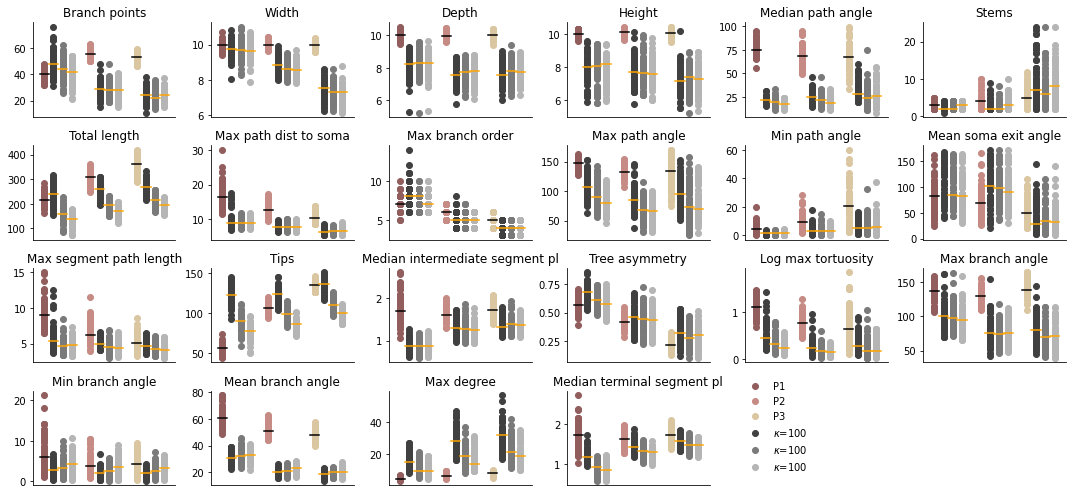

In [15]:
sns.set(font_scale=1.25)
sns.set_style('white')


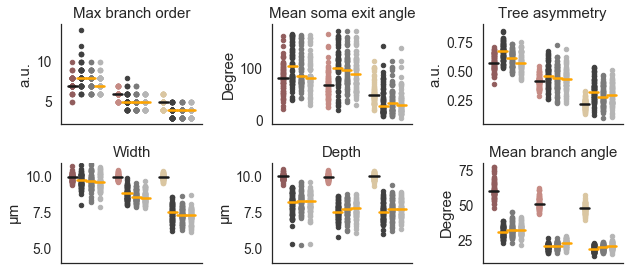

### get morphometrics in table

In [2]:
from copy import copy

In [29]:
morphometrics_table = copy(morphometrics)#.groupby('label').mean()[features].T.round()
morphometrics_table = morphometrics_table.rename(columns={'label':'P'})
morphometrics_table['label'] = 'true'

In [30]:
morphometrics_toy_100['P'] = morphometrics_toy_100['P'].apply(lambda x: 'P%i'%(x+1))
morphometrics_toy_300['P'] = morphometrics_toy_300['P'].apply(lambda x: 'P%i'%(x+1))
morphometrics_toy_500['P'] = morphometrics_toy_500['P'].apply(lambda x: 'P%i'%(x+1))

In [31]:
morphometrics_toy_100['label'] = 'k100'

morphometrics_table = pd.concat((morphometrics_table, morphometrics_toy_100))

morphometrics_toy_300['label'] = 'k300'
morphometrics_table = pd.concat((morphometrics_table, morphometrics_toy_300))

morphometrics_toy_500['label'] = 'k500'
morphometrics_table = pd.concat((morphometrics_table, morphometrics_toy_500))

In [32]:
renamed_features = [s.replace("_", " ").capitalize() for s in features]
rename_dict = dict(zip(morphometrics_table.columns, [s.replace("_", " ").capitalize() for s in morphometrics_table.columns]))

morphometrics_table = morphometrics_table.rename(columns=rename_dict)
del morphometrics_table['Unnamed: 0']

In [34]:
morphometrics_table.groupby(['P', 'Label']).mean()[renamed_features].T.round(1)

P                                  P1                          P2         \
Label                            k100   k300   k500   true   k100   k300   
Branch points                    49.7   44.1   40.7   38.7   29.5   27.8   
Width                             9.7    9.7    9.6   10.0    8.8    8.6   
Depth                             8.2    8.2    8.2   10.0    7.6    7.7   
Height                            7.8    7.9    7.9   10.0    7.7    7.8   
Median path angle                22.1   20.7   18.3   77.3   26.0   22.7   
Stems                             2.2    2.5    2.7    2.8    2.8    2.8   
Total length                    239.4  156.6  135.3  221.1  256.8  193.1   
Max path dist to soma             9.5    9.0    9.0   18.4    7.7    7.9   
Max branch order                  8.2    7.6    7.4    7.4    5.1    4.9   
Max path angle                  108.6   92.5   81.4  149.4   86.6   68.7   
Min path angle                    1.4    1.9    1.8    4.7    3.9    3.7   
Mean soma exit angle            107.8   96.3   89.9   86.6  100.4   98.2   
Max segment path length           5.8    4.8    4.9   10.2    5.1    4.5   
Tips                            123.8   89.7   77.5   55.1  124.5   98.4   
Median intermediate segment pl    0.9    0.9    0.9    1.8    1.3    1.3   
Tree asymmetry                    0.7    0.6    0.6    0.6    0.5    0.4   
Log max tortuosity                0.5    0.3    0.3    1.2    0.3    0.2   
Max branch angle                100.2  100.8   97.3  138.4   77.8   74.6   
Min branch angle                  3.0    3.5    4.4    7.0    2.2    2.8   
Mean branch angle                30.9   32.7   32.7   62.5   20.2   21.0   
Max degree                       16.0   10.4    9.1    4.5   29.1   19.4   
Median terminal segment pl        1.2    0.9    0.9    1.8    1.4    1.3   

P                                                P3                       
Label                            k500   true   k100   k300   k500   true  
Branch points                    28.0   55.5   23.9   23.0   24.5   52.1  
Width                             8.6   10.0    7.5    7.3    7.3   10.0  
Depth                             7.7   10.0    7.5    7.8    7.8   10.0  
Height                            7.7   10.0    7.2    7.3    7.3   10.0  
Median path angle                19.3   69.4   31.6   26.0   27.6   69.9  
Stems                             3.2    4.2    9.1    7.7    8.8    6.2  
Total length                    171.1  307.7  273.6  213.1  194.7  358.4  
Max path dist to soma             7.8   12.6    6.5    6.6    6.5   10.5  
Max branch order                  4.9    6.0    3.8    3.8    3.8    4.7  
Max path angle                   66.2  132.1   96.5   77.7   80.7  134.0  
Min path angle                    3.7    9.3    5.9    7.4    7.3   20.3  
Mean soma exit angle             92.5   69.7   39.7   40.6   37.3   51.2  
Max segment path length           4.4    6.5    4.8    4.3    4.2    5.3  
Tips                             86.1  106.9  136.1  110.6   99.0  134.5  
Median intermediate segment pl    1.3    1.6    1.4    1.4    1.4    1.7  
Tree asymmetry                    0.4    0.4    0.3    0.3    0.3    0.2  
Log max tortuosity                0.2    0.8    0.3    0.2    0.2    0.7  
Max branch angle                 75.1  129.6   81.5   70.9   72.7  139.5  
Min branch angle                  3.7    4.1    2.1    2.6    3.2    4.0  
Mean branch angle                22.9   51.3   18.8   19.6   20.7   47.8  
Max degree                       15.9    6.2   33.1   22.6   19.3    7.7  
Median terminal segment pl        1.3    1.6    1.6    1.5    1.5    1.7

In [75]:
# print(morphometrics_table.groupby(['P', 'Label']).mean()[renamed_features].T.round(1).to_latex())

In [70]:
morphometrics_table.groupby(['P', 'Label']).std()[renamed_features].T.round(1)

P                                 P1                      P2              \
Label                           k100  k300  k500  true  k100  k300  k500   
Branch points                    8.5   7.8   7.4   3.9   5.9   5.6   5.7   
Width                            0.5   0.6   0.5   0.2   0.4   0.4   0.4   
Depth                            0.7   0.7   0.7   0.2   0.6   0.6   0.6   
Height                           0.8   0.9   0.8   0.2   0.8   0.8   0.8   
Median path angle                2.7   3.6   3.0   7.8   5.9   5.4   5.1   
Stems                            0.5   0.7   0.8   1.0   1.5   1.2   1.6   
Total length                    33.8  26.8  23.1  29.0  27.6  21.1  19.3   
Max path dist to soma            2.3   1.0   1.0   4.3   0.7   0.8   0.7   
Max branch order                 1.4   1.0   1.0   0.8   0.8   0.8   0.7   
Max path angle                  18.4  18.8  18.4   6.7  20.8  18.4  17.1   
Min path angle                   0.7   0.9   0.9   3.0   2.9   2.7   2.3   
Mean soma exit angle            35.7  31.8  31.4  36.1  36.4  30.5  33.5   
Max segment path length          1.6   1.0   0.8   2.7   0.6   0.8   0.6   
Tips                            10.4   9.3   8.2   6.1   8.5   7.0   6.0   
Median intermediate segment pl   0.1   0.1   0.1   0.4   0.2   0.2   0.2   
Tree asymmetry                   0.1   0.1   0.1   0.1   0.1   0.1   0.1   
Log max tortuosity               0.3   0.2   0.1   0.2   0.2   0.1   0.1   
Max branch angle                19.2  19.2  17.7  10.3  19.9  15.3  15.2   
Min branch angle                 1.5   1.9   2.2   3.9   1.2   1.4   2.0   
Mean branch angle                3.8   4.6   3.9   5.6   2.1   2.1   2.5   
Max degree                       4.3   3.5   3.3   0.8   7.5   6.0   5.7   
Median terminal segment pl       0.2   0.1   0.1   0.4   0.1   0.1   0.1   

P                                       P3                    
Label                           true  k100  k300  k500  true  
Branch points                    3.1   5.2   5.1   4.5   3.0  
Width                            0.2   0.5   0.5   0.5   0.2  
Depth                            0.2   0.6   0.7   0.6   0.2  
Height                           0.2   0.8   0.7   0.8   0.2  
Median path angle                9.3   9.0  10.1  10.2  14.5  
Stems                            1.8   6.0   4.4   4.7   2.4  
Total length                    29.8  27.4  20.5  17.5  28.6  
Max path dist to soma            2.0   0.7   0.7   0.8   1.3  
Max branch order                 0.7   0.7   0.6   0.7   0.6  
Max path angle                   9.2  25.2  33.2  28.5  18.5  
Min path angle                   5.4   3.5   5.4   6.3  12.4  
Mean soma exit angle            27.7  27.7  25.2  25.2  20.8  
Max segment path length          1.4   0.7   0.7   0.7   1.0  
Tips                             5.6   7.7   6.6   5.6   4.7  
Median intermediate segment pl   0.2   0.2   0.2   0.2   0.1  
Tree asymmetry                   0.1   0.1   0.1   0.1   0.0  
Log max tortuosity               0.2   0.2   0.2   0.2   0.3  
Max branch angle                 9.9  19.4  16.7  18.3  13.8  
Min branch angle                 2.3   1.0   1.3   1.3   2.2  
Mean branch angle                4.0   2.2   2.0   2.2   3.2  
Max degree                       1.0   8.5   6.5   5.6   1.1  
Median terminal segment pl       0.2   0.1   0.1   0.1   0.1

# M1 data

## Exc data

In [3]:
pyr_neurons = load_neurons('./data/M1_exc_data/neurons/', sort=False)

In [78]:
morphometrics = pd.DataFrame()
for n in pyr_neurons:
    df_ = fp.compute_morphometric_statistics(n)
    morphometrics = pd.concat((morphometrics, df_))
    
morphometrics = morphometrics.reset_index()
del morphometrics['index']

In [209]:
morphometrics.to_csv('./data/M1_data/morphometrics/morphometrics_m1_real.csv')

In [12]:
sampled_m1_neurons_100 = load_neurons('./data/M1_exc_data/sampled_neurons/test_data/k100/', sort=False)
sampled_m1_neurons_300 = load_neurons('./data/M1_exc_data/sampled_neurons/test_data/k300/', sort=False)
sampled_m1_neurons_500 = load_neurons('./data/M1_exc_data/sampled_neurons/test_data/k500/', sort=False)

In [13]:
morphometrics_m1_100 = pd.DataFrame()
for n in sampled_m1_neurons_100:
    df_ = fp.compute_morphometric_statistics(n)
    morphometrics_m1_100 = pd.concat((morphometrics_m1_100, df_))
    
morphometrics_m1_100 = morphometrics_m1_100.reset_index()
del morphometrics_m1_100['index']


morphometrics_m1_300 = pd.DataFrame()
for n in sampled_m1_neurons_300:
    df_ = fp.compute_morphometric_statistics(n)
    morphometrics_m1_300 = pd.concat((morphometrics_m1_300, df_))
    
morphometrics_m1_300 = morphometrics_m1_300.reset_index()
del morphometrics_m1_300['index']



morphometrics_m1_500 = pd.DataFrame()
for n in sampled_m1_neurons_500:

    df_ = fp.compute_morphometric_statistics(n)
    morphometrics_m1_500 = pd.concat((morphometrics_m1_500, df_))

morphometrics_m1_500 = morphometrics_m1_500.reset_index()
del morphometrics_m1_500['index']

In [215]:
morphometrics_m1_100.to_csv('./data/M1_exc_data/morphometrics/test_data/morphometrics_m1_100.csv')
morphometrics_m1_300.to_csv('./data/M1_exc_data/morphometrics/test_data/morphometrics_m1_300.csv')
morphometrics_m1_500.to_csv('./data/M1_exc_data/morphometrics/test_data/morphometrics_m1_500.csv')

### create morphometrics for Trees Toolbox samples

In [3]:
import os
from morphopy.neurontree import NeuronTree as nt

In [4]:

def load_tt_neurons(path, neurite_type, resampling_dist):
    neurons = []
    for path, _, files in os.walk(path):
   
        for f in files:
            swc = pd.read_csv(path+f, delim_whitespace=True, comment='#',
                      names=['n', 'type', 'x', 'y', 'z', 'radius', 'parent'], index_col=False)
            
            swc.loc[swc['parent'] != -1, 'type'] = neurite_type #change the type as they are all assigned as soma
            swc[['x','y', 'z']] /= 100
            N_ = nt.NeuronTree(swc=swc)
            N = N_.resample_tree(resampling_dist)
            neurons.append(N)
    return neurons

In [6]:
tt_pyr_neurons = load_tt_neurons('./data/M1_exc_data/TREESToolbox/swc/', neurite_type=3, resampling_dist=.5)

In [7]:
tt_morphometrics = pd.DataFrame()
for n in tt_pyr_neurons:
    df_ = fp.compute_morphometric_statistics(n)
    tt_morphometrics = pd.concat((tt_morphometrics, df_))
    
tt_morphometrics.reset_index()

tt_morphometrics.to_csv('./data/M1_exc_data/TREESToolbox/morphometrics/morphometrics_tt.csv')

## INH data

In [41]:
inh_neurons = load_neurons('./data/M1_inh_data/neurons/axon/', sort=False)

In [35]:
morphometrics = pd.DataFrame()
for n in inh_neurons:
    df_ = fp.compute_morphometric_statistics(n)
    morphometrics = pd.concat((morphometrics, df_))
    
morphometrics = morphometrics.reset_index()
del morphometrics['index']

In [186]:
morphometrics.to_csv('./data/M1_inh_data/morphometrics/axon/m1_real.csv')

In [45]:
#load in sampled data
sampled_m1_neurons_100 = load_neurons('./data/M1_inh_data/sampled_neurons/axon/test_data/k100/', sort=False)
sampled_m1_neurons_300 = load_neurons('./data/M1_inh_data/sampled_neurons/axon/test_data/k300/', sort=False)
sampled_m1_neurons_500 = load_neurons('./data/M1_inh_data/sampled_neurons/axon/test_data/k500/', sort=False)

In [46]:
# sample morphometrics
morphometrics_m1_100 = pd.DataFrame()
for n in sampled_m1_neurons_100:
    df_ = fp.compute_morphometric_statistics(n)
    morphometrics_m1_100 = pd.concat((morphometrics_m1_100, df_))
    
morphometrics_m1_100 = morphometrics_m1_100.reset_index()
del morphometrics_m1_100['index']


morphometrics_m1_300 = pd.DataFrame()
for n in sampled_m1_neurons_300:
    df_ = fp.compute_morphometric_statistics(n)
    morphometrics_m1_300 = pd.concat((morphometrics_m1_300, df_))
    
morphometrics_m1_300 = morphometrics_m1_300.reset_index()
del morphometrics_m1_300['index']



morphometrics_m1_500 = pd.DataFrame()
for n in sampled_m1_neurons_500:

    df_ = fp.compute_morphometric_statistics(n)
    morphometrics_m1_500 = pd.concat((morphometrics_m1_500, df_))

morphometrics_m1_500 = morphometrics_m1_500.reset_index()
del morphometrics_m1_500['index']

In [190]:
morphometrics_m1_100.to_csv('./data/M1_inh_data/morphometrics/axon/test_data/morphometrics_m1_100.csv')
morphometrics_m1_300.to_csv('./data/M1_inh_data/morphometrics/axon/test_data/morphometrics_m1_300.csv')
morphometrics_m1_500.to_csv('./data/M1_inh_data/morphometrics/axon/test_data/morphometrics_m1_500.csv')

In [17]:
# for TREES Toolbox samples

tt_inh_neurons = load_tt_neurons('./data/M1_inh_data/TREESToolbox/swc/', neurite_type=2, resampling_dist=.4)

In [18]:
tt_morphometrics = pd.DataFrame()
for n in tt_inh_neurons:
    df_ = fp.compute_morphometric_statistics(n)
    tt_morphometrics = pd.concat((tt_morphometrics, df_))
    
tt_morphometrics.reset_index()

tt_morphometrics.to_csv('./data/M1_inh_data/TREESToolbox/morphometrics/morphometrics_tt.csv')

## Farrow data

In [88]:
rgc_neurons = np.array(load_neurons('./data/Farrow_data/neurons/soma_centered/', sort=False))

In [89]:
import os
# get the neuron files in the right order
root, _, files = list(os.walk('./data/Farrow_data/neurons/soma_centered/'))[0]
files = np.array(files)
file_ix = files.argsort()
rgc_neurons = rgc_neurons[file_ix]


In [90]:
morphometrics = pd.DataFrame()
for n in rgc_neurons:
    df_ = fp.compute_morphometric_statistics(n)
    morphometrics = pd.concat((morphometrics, df_))
    
morphometrics = morphometrics.reset_index()
del morphometrics['index']

In [204]:
morphometrics.to_csv('./data/Farrow_data/morphometrics/morphometrics_real.csv')

In [113]:
#load in sampled data

_, _ , files = list(os.walk('./data/Farrow_data/sampled_neurons/soma_centered/test_data/k100/'))[0]

sampled_m1_neurons_100 = load_neurons('./data/Farrow_data/sampled_neurons/soma_centered/test_data/k100/', sort=False)
sampled_m1_neurons_300 = load_neurons('./data/Farrow_data/sampled_neurons/soma_centered/test_data/k300/', sort=False)
sampled_m1_neurons_500 = load_neurons('./data/Farrow_data/sampled_neurons/soma_centered/test_data/k500/', sort=False)

In [114]:
# sample morphometrics
morphometrics_m1_100 = pd.DataFrame()
for n in sampled_m1_neurons_100:
    df_ = fp.compute_morphometric_statistics(n)
    morphometrics_m1_100 = pd.concat((morphometrics_m1_100, df_))
    
morphometrics_m1_100 = morphometrics_m1_100.reset_index()
del morphometrics_m1_100['index']


morphometrics_m1_300 = pd.DataFrame()
for n in sampled_m1_neurons_300:
    df_ = fp.compute_morphometric_statistics(n)
    morphometrics_m1_300 = pd.concat((morphometrics_m1_300, df_))
    
morphometrics_m1_300 = morphometrics_m1_300.reset_index()
del morphometrics_m1_300['index']



morphometrics_m1_500 = pd.DataFrame()
for n in sampled_m1_neurons_500:

    df_ = fp.compute_morphometric_statistics(n)
    morphometrics_m1_500 = pd.concat((morphometrics_m1_500, df_))

morphometrics_m1_500 = morphometrics_m1_500.reset_index()
del morphometrics_m1_500['index']

In [182]:
morphometrics_m1_100.to_csv('./data/Farrow_data/morphometrics/soma-centered/test_data/morphometrics_rgc_100.csv')
morphometrics_m1_300.to_csv('./data/Farrow_data/morphometrics/soma-centered/test_data/morphometrics_rgc_300.csv')
morphometrics_m1_500.to_csv('./data/Farrow_data/morphometrics/soma-centered/test_data/morphometrics_rgc_500.csv')

In [69]:
# for TREES Toolbox samples

tt_rgc_neurons = load_tt_neurons('./data/Farrow_data/TREESToolbox/swc/', neurite_type=3, resampling_dist=.3)

In [71]:
tt_morphometrics = pd.DataFrame()
for n in tt_rgc_neurons:
    df_ = fp.compute_morphometric_statistics(n)
    tt_morphometrics = pd.concat((tt_morphometrics, df_))
    
tt_morphometrics.reset_index()

tt_morphometrics.to_csv('./data/Farrow_data/TREESToolbox/morphometrics/morphometrics_tt.csv')

# Plot morphometric statistics

## toy data

In [231]:
import os

In [112]:
# load data
morphometrics = pd.read_csv('./data/toy_data/3_populations/morphometrics/morphometrics_toy_real.csv')

morphometrics_toy_100 = pd.read_csv('./data/toy_data/3_populations/morphometrics/test_data/morphometrics_toy_100.csv')
morphometrics_toy_300 =  pd.read_csv('./data/toy_data/3_populations/morphometrics/test_data/morphometrics_toy_300.csv')
morphometrics_toy_500 =  pd.read_csv('./data/toy_data/3_populations/morphometrics/test_data/morphometrics_toy_500.csv')



In [232]:
# get labels and test data indices
_, _ , files = list(os.walk('./data/toy_data/3_populations/sampled_neurons/test_data/v1/k100/'))[0]
test_indices = np.array([int(f[:-4]) for f in files])

cell_ids = np.array([int(f[:-4]) for f in files])
labels = np.zeros((cell_ids.shape))
labels[cell_ids >= 400] = 1
labels[cell_ids >= 800] = 2

In [233]:
features = ['branch_points', 'width', 'depth', 'height', 'median_path_angle',
       'stems', 'total_length', 'max_path_dist_to_soma',
       'max_branch_order', 'max_path_angle', 'min_path_angle',
        'mean_soma_exit_angle', 'max_segment_path_length', 'tips',
       'median_intermediate_segment_pl', 'tree_asymmetry',
       'log_max_tortuosity',
       'max_branch_angle', 'min_branch_angle', 'mean_branch_angle',
       'max_degree', 'median_terminal_segment_pl']

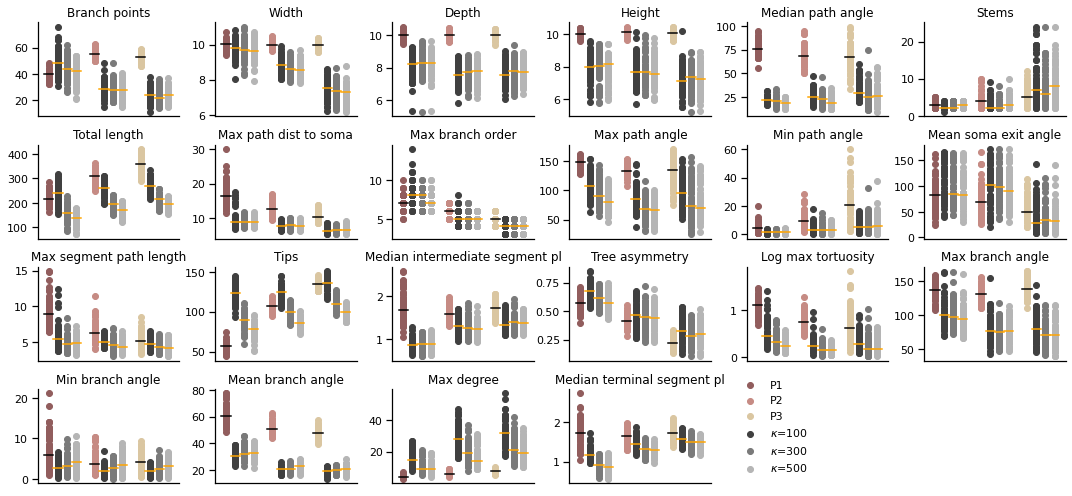

In [234]:
fig, axes = plt.subplots(4,6,figsize=(15,7))
axes = axes.flatten()
colors = sns.color_palette('pink', n_colors=4)
morphometrics_ = morphometrics.iloc[test_indices]
for k in range(len(features)):
    
    axes[k].scatter([1]*sum(labels==0), morphometrics_[features[k]].values[labels == 0], c=[colors[0]] , label='P1')
    axes[k].scatter([2]*sum(labels == 1), morphometrics_[features[k]].values[labels == 1], c=[colors[1]], label='P2' )
    axes[k].scatter([3]*sum(labels == 2), morphometrics_[features[k]].values[labels == 2], c=[colors[2]], label='P3' )

    axes[k].plot([.9,1.1],  [np.median(morphometrics_[features[k]].values[labels == 0]), 
                             np.median(morphometrics_[features[k]].values[labels == 0])], c='k')
    axes[k].plot([1.9,2.1],  [np.median(morphometrics_[features[k]].values[labels == 1]), 
                             np.median(morphometrics_[features[k]].values[labels == 1])], c='k')
    axes[k].plot([2.9,3.1],  [np.median(morphometrics_[features[k]].values[labels == 2]), 
                             np.median(morphometrics_[features[k]].values[labels == 2])], c='k')
    sns.despine()
    axes[k].set_xticks([])
    axes[k].set_title(features[k].capitalize().replace('_', ' '))
axes[-1].axis('off')
axes[-2].axis('off')

sample_colors = sns.color_palette('Greys_r', n_colors=4)
kappas = [f'$\kappa$=100', f'$\kappa$=300', f'$\kappa$=500']
for n, df in enumerate([morphometrics_toy_100, morphometrics_toy_300, morphometrics_toy_500]):
    
    
    for k in range(len(features)):
    
        
        axes[k].scatter([1 + (n+1)*0.2]*sum(labels == 0), df[features[k]].values[labels == 0], 
                        c=[sample_colors[n]], label=kappas[n] )
        axes[k].scatter([2 + (n+1)*0.2]*sum(labels == 1), df[features[k]].values[labels == 1], 
                        c=[sample_colors[n]], label=kappas[n]  )
        axes[k].scatter([3 + (n+1)*0.2]*sum(labels == 2), df[features[k]].values[labels == 2], 
                        c=[sample_colors[n]], label=kappas[n] )

        axes[k].plot([.9 + (n+1)*0.2,1.1 + (n+1)*0.2],  
                     [np.median(df[features[k]].values[labels == 0]), 
                                 np.median(df[features[k]].values[labels == 0])], c='orange')
        axes[k].plot([1.9 + (n+1)*0.2,2.1 +(n+1)*0.2],  
                     [np.median(df[features[k]].values[labels == 1]), 
                                 np.median(df[features[k]].values[labels == 1])], c='orange')
        axes[k].plot([2.9 + (n+1)*0.2,3.1 + (n+1)*0.2],  [np.median(df[features[k]].values[labels == 2]), 
                                 np.median(df[features[k]].values[labels == 2])], c='orange')
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.25)
handles, legend_labels = axes[-3].get_legend_handles_labels()
legend_handles = np.array(handles)[[0,1,2,3,6,9]]
legend_labels = np.array(legend_labels)[[0,1,2,3,6,9]]
axes[-2].legend(legend_handles,legend_labels, frameon=False, bbox_to_anchor=(.5,1.2))
#plt.savefig('./pics/ICML/Suppl/morphometrics_toy_data_test.svg', format='svg')
plt.savefig('./pics/ICML/camera-ready/Suppl/morphometrics_toy_data_test.pdf', format='pdf')

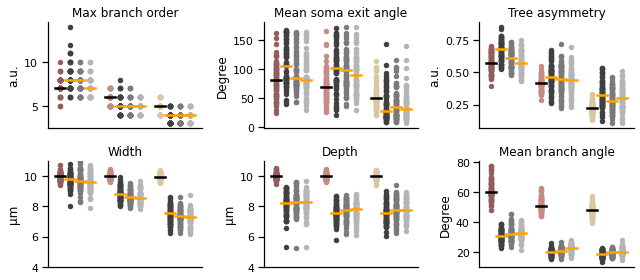

In [235]:
## Only show selected features

features = ['max_branch_order','mean_soma_exit_angle', 'tree_asymmetry', 
            'width', 'depth','mean_branch_angle']

titles = ['Max branch order', 'Mean soma exit angle', 'Tree asymmetry', 
           'Width', 'Depth', 'Mean branch angle']
units = ['a.u.', 'Degree', 'a.u.', 'µm', 'µm', 'Degree']
# ylabels = ['Max branch order', 'Mean soma exit \n angle [Degree]', 'Tree asymmetry', 
#            'Width [µm]', 'Depth [µm]', 'Mean branch angle \n [Degree]']
xlabels = ['P1', 'κ100', 'κ300', 'κ500', 'P2','κ100', 'κ300', 'κ500','P3','κ100', 'κ300', 'κ500' ]

fig, axes = plt.subplots(2,3,figsize=(9,4))
axes = axes.flatten()
colors = sns.color_palette('pink', n_colors=4)
morphometrics_ = morphometrics.iloc[test_indices]
ms = 20
for k in range(len(features)):
    
    axes[k].scatter([1]*sum(labels==0), morphometrics_[features[k]].values[labels == 0], 
                    c=[colors[0]] ,s=ms, label='P1')
    axes[k].scatter([2]*sum(labels == 1), morphometrics_[features[k]].values[labels == 1],
                    c=[colors[1]], s=ms,label='P2' )
    axes[k].scatter([3]*sum(labels == 2), morphometrics_[features[k]].values[labels == 2], 
                    c=[colors[2]], s=ms,label='P3' )

    axes[k].plot([.9,1.1],  [np.median(morphometrics_[features[k]].values[labels == 0]), 
                             np.median(morphometrics_[features[k]].values[labels == 0])], 
                 c='k', linewidth=2.5)
    axes[k].plot([1.9,2.1],  [np.median(morphometrics_[features[k]].values[labels == 1]), 
                             np.median(morphometrics_[features[k]].values[labels == 1])], 
                 c='k', linewidth=2.5)
    axes[k].plot([2.9,3.1],  [np.median(morphometrics_[features[k]].values[labels == 2]), 
                             np.median(morphometrics_[features[k]].values[labels == 2])], 
                 c='k', linewidth=2.5)
    sns.despine()
#     axes[k].set_xticks([1, 1.2, 1.4, 1.6, 2, 2.2, 2.4, 2.6, 3, 3.2, 3.4, 3.6 ])
#     axes[k].set_xticklabels(xlabels, rotation=90)
#     axes[k].set_ylabel(ylabels[k])
    axes[k].set_xticks([])
    axes[k].set_ylabel(units[k])
    axes[k].set_title(titles[k])

sample_colors = sns.color_palette('Greys_r', n_colors=4)
for n, df in enumerate([morphometrics_toy_100, morphometrics_toy_300, morphometrics_toy_500]):

    for k in range(len(features)):
    
        axes[k].scatter([1 + (n+1)*0.2]*sum(labels == 0), df[features[k]].values[labels == 0], 
                        c=[sample_colors[n]], s=ms)
        axes[k].scatter([2 + (n+1)*0.2]*sum(labels == 1), df[features[k]].values[labels == 1], 
                        c=[sample_colors[n]], s=ms )
        axes[k].scatter([3 + (n+1)*0.2]*sum(labels == 2), df[features[k]].values[labels == 2], 
                        c=[sample_colors[n]], s=ms )

        l0_values = df[features[k]].values[labels == 0]
        l0_values = l0_values[~df[features[k]].iloc[labels==0].isna()]
        
        l1_values = df[features[k]].values[labels == 1]
        l1_values = l1_values[~df[features[k]].iloc[labels==1].isna()]
        
        l2_values = df[features[k]].values[labels == 2]
        l2_values = l2_values[~df[features[k]].iloc[labels==2].isna()]
        axes[k].plot([.9 + (n+1)*0.2,1.1 + (n+1)*0.2],  
                     [np.median(l0_values), 
                      np.median(l0_values)], 
                     c='orange', linewidth=2.5)
        axes[k].plot([1.9 + (n+1)*0.2,2.1 +(n+1)*0.2],  
                     [np.median(l1_values), 
                                 np.median(l1_values)], 
                     c='orange', linewidth=2.5)
        axes[k].plot([2.9 + (n+1)*0.2,3.1 + (n+1)*0.2],  
                     [np.median(l2_values), 
                                 np.median(l2_values)], 
                     c='orange', linewidth=2.5)
axes[3].set_ylim([4,11])
axes[4].set_ylim([4,11])
handles, legend_labels = axes[-1].get_legend_handles_labels()
# axes[2].legend(handles, legend_labels, frameon=False, bbox_to_anchor=(1,.9))
plt.tight_layout()
plt.savefig('./pics/ICML/camera-ready/Fig5/morphometrics_toy_data_test_selection_v3.svg', format='svg')

## M1 EXC data

In [93]:
morphometrics = pd.read_csv('./data/M1_exc_data/morphometrics/morphometrics_m1_real.csv')

morphometrics_m1_100 = pd.read_csv('./data/M1_exc_data/morphometrics/test_data/morphometrics_m1_100.csv')
morphometrics_m1_300 =  pd.read_csv('./data/M1_exc_data/morphometrics/test_data/morphometrics_m1_300.csv')
morphometrics_m1_500 =  pd.read_csv('./data/M1_exc_data/morphometrics/test_data/morphometrics_m1_500.csv')

morphometrics_tt = pd.read_csv('./data/M1_exc_data/TREESToolbox/morphometrics/morphometrics_tt.csv')

In [94]:
import pickle
with open('./data/M1_exc_data/iterator/m_labels/test_iterator.pkl', 'rb') as f:
    test_iterator = pickle.load(f)

In [95]:
meta_data = pd.read_csv('./data/M1_exc_data/meta_data_m_type_label.csv')
labels = meta_data['m-type2'].values

# sampled files have been named according to their index
_, _ , files = list(os.walk('./data/M1_exc_data/sampled_neurons/test_data/k100/'))[0]
indices_test = np.array(test_iterator.sampler.indices)
labels_test = np.array(test_iterator.dataset.labels)[indices_test]

# labels_test will be the labels of all data in the order they appear in

# get proper sorting of the sampled data
sampled_order = np.array([int(f[:-4]) for f in files])
label_indices = [np.where(sampled_order == i)[0][0] for i in indices_test]


# get proper order for tt_files
_, _ , tt_files = list(os.walk('./data/M1_exc_data/TREESToolbox/swc/'))[0]
tt_files = np.array([f[:-4] for f in tt_files])
tt_order = [np.where(tt_files == s)[0][0] for s in meta_data.iloc[indices_test]['sample name']]

In [96]:
features = ['branch_points', 'width', 'depth', 'height', 'median_path_angle',
       'stems', 'total_length', 'max_path_dist_to_soma',
       'max_branch_order', 'max_path_angle', 'min_path_angle',
        'mean_soma_exit_angle', 'max_segment_path_length', 'tips',
       'median_intermediate_segment_pl', 'tree_asymmetry',
       'log_max_tortuosity',
       'max_branch_angle', 'min_branch_angle', 'mean_branch_angle',
       'max_degree', 'median_terminal_segment_pl']

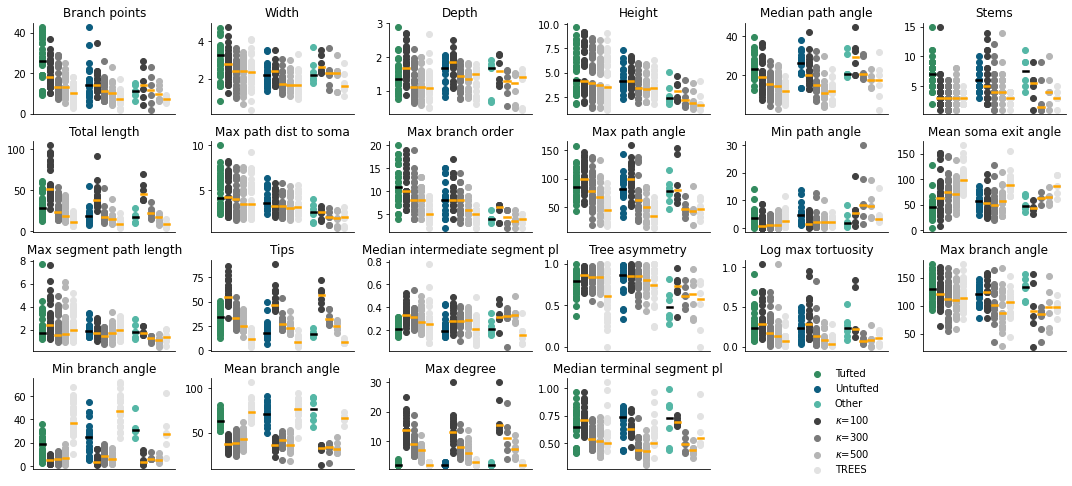

In [97]:
colors =['#338b5f', 
        '#0d5d7f','#55b7a6']

label_dict = {0:'Tufted', 1:'Untufted', 2: 'Other'}
fig, axes = plt.subplots(4,6,figsize=(15,7))
axes = axes.flatten()

morphometrics_ = morphometrics.iloc[indices_test]
morph_labels = np.array(labels_test)
offset = 1.8
for k in range(len(features)):
    for l in np.unique(morph_labels):
        axes[k].scatter([l*offset]*sum(morph_labels == l), morphometrics_[features[k]].values[morph_labels == l], 
                        c=[colors[l]], label=label_dict[l] )
   
        axes[k].plot([l*offset-.1,l*offset +.1],  [morphometrics_[morph_labels == l][features[k]].median(skipna=True), 
                                 morphometrics_[morph_labels == l][features[k]].median(skipna=True)],
                     c='k', linewidth=2.5)
    
        sns.despine()
        axes[k].set_xticks([])
        axes[k].set_title(features[k].capitalize().replace('_', ' '))
axes[-1].axis('off')
axes[-2].axis('off')

morphometrics_tt = morphometrics_tt.iloc[tt_order]
sample_colors = sns.color_palette('Greys_r', n_colors=4)
kappas = [f'$\kappa$=100', f'$\kappa$=300', f'$\kappa$=500', 'TREES']
for n, df in enumerate([morphometrics_m1_100.iloc[label_indices], morphometrics_m1_300.iloc[label_indices], 
                        morphometrics_m1_500.iloc[label_indices], morphometrics_tt]):

    for k in range(len(features)):
        for l in np.unique(morph_labels):
            axes[k].scatter([l*offset + (n+1)*0.3]*sum(morph_labels == l), 
                            df[features[k]].values[morph_labels == l], 
                            c=[sample_colors[n]],label=kappas[n] )

            axes[k].plot([l*offset-.1 + (n+1)*0.3,l*offset + .1 + (n+1)*0.3],  
                         [df[morph_labels == l][features[k]].median(skipna=True), 
                          df[morph_labels == l][features[k]].median(skipna=True)], 
                         c='orange', linewidth=2.5)


handles, legend_labels = axes[-3].get_legend_handles_labels()
legend_handles = np.array(handles)[[0,1,2,3,6,9,12]]
legend_labels = np.array(legend_labels)[[0,1,2,3,6,9,12]]
axes[-2].legend(legend_handles,legend_labels, frameon=False, bbox_to_anchor=(1,1.2))

plt.tight_layout() 
plt.subplots_adjust(hspace=0.3, wspace=0.25)
plt.savefig('./pics/ICML/camera-ready/Suppl/morphometrics_m1_exc_data.svg', format='svg')
plt.savefig('./pics/ICML/camera-ready/Suppl/morphometrics_m1_exc_data.pdf', format='pdf')

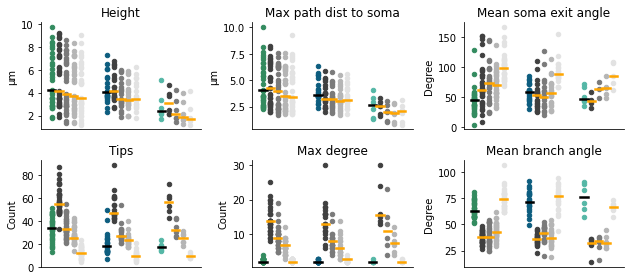

In [98]:
## Only show selected features

features = ['height', 'max_path_dist_to_soma','mean_soma_exit_angle', 
             'tips','max_degree', 'mean_branch_angle', ]

# ylabels = ['Width [µm]', 'Height [µm]', 'Tree asymmetry', 
#            'Mean soma exit \n angle [Degree]', 'Mean branch angle \n [Degree]', 'Branch points' ]


titles = ['Height',  'Max path dist to soma', 'Mean soma exit angle',
          'Tips', 'Max degree', 'Mean branch angle']
units = ['µm', 'µm', 'Degree', 'Count', 'Count', 'Degree']

ms = 20
fig, axes = plt.subplots(2,3,figsize=(9,4))
axes = axes.flatten()

colors =['#338b5f', 
        '#0d5d7f','#55b7a6']
morphometrics_ = morphometrics.iloc[indices_test]
for k in range(len(features)):
    
    axes[k].scatter([1]*sum(morph_labels == 0), morphometrics_[features[k]].values[morph_labels == 0], 
                    c=[colors[0]], s=ms, label='Tufted' )
    axes[k].scatter([2.5]*sum(morph_labels == 1), morphometrics_[features[k]].values[morph_labels == 1], 
                    c=[colors[1]], s=ms, label='Untufted' )
    axes[k].scatter([4]*sum(morph_labels == 2), morphometrics_[features[k]].values[morph_labels == 2], 
                    c=[colors[2]], s=ms, label='Other' )

    axes[k].plot([.9,1.1],  [np.median(morphometrics_[features[k]].values[morph_labels == 0]), 
                             np.median(morphometrics_[features[k]].values[morph_labels == 0])], 
                 c='k', linewidth=2.5)
    axes[k].plot([2.4,2.6],  [np.median(morphometrics_[features[k]].values[morph_labels == 1]), 
                             np.median(morphometrics_[features[k]].values[morph_labels == 1])], 
                 c='k', linewidth=2.5)
    axes[k].plot([3.9,4.1],  [np.median(morphometrics_[features[k]].values[morph_labels == 2]), 
                             np.median(morphometrics_[features[k]].values[morph_labels == 2])], 
                 c='k', linewidth=2.5)
    sns.despine()
    axes[k].set_xticks([])
    axes[k].set_ylabel(units[k])
    axes[k].set_title(titles[k])

sample_colors = sns.color_palette('Greys_r', n_colors=4)
for n, df in enumerate([morphometrics_m1_100.iloc[label_indices], morphometrics_m1_300.iloc[label_indices], 
                        morphometrics_m1_500.iloc[label_indices], morphometrics_tt] ):
    
    for k in range(len(features)):
    
        axes[k].scatter([1 + (n+1)*0.2]*sum(morph_labels == 0), df[features[k]].values[morph_labels == 0], 
                        c=[sample_colors[n]], s=ms )
        axes[k].scatter([2.5 + (n+1)*0.2]*sum(morph_labels == 1), df[features[k]].values[morph_labels == 1], 
                        c=[sample_colors[n]], s=ms )
        axes[k].scatter([4 + (n+1)*0.2]*sum(morph_labels == 2), df[features[k]].values[morph_labels == 2], 
                        c=[sample_colors[n]], s=ms )
        
        
        

        axes[k].plot([.9 + (n+1)*0.2,1.1 + (n+1)*0.2],  
                     [df[morph_labels == 0][features[k]].median(skipna=True),
                      df[morph_labels == 0][features[k]].median(skipna=True)], 
                     c='orange', linewidth=2.5)
        axes[k].plot([2.4 + (n+1)*0.2, 2.6 +(n+1)*0.2],  
                     [df[morph_labels == 1][features[k]].median(skipna=True),
                      df[morph_labels == 1][features[k]].median(skipna=True)], 
                     c='orange', linewidth=2.5)
        axes[k].plot([3.9 + (n+1)*0.2,4.1 + (n+1)*0.2], 
                     [df[morph_labels == 2][features[k]].median(skipna=True),
                      df[morph_labels == 2][features[k]].median(skipna=True)], 
                     c='orange', linewidth=2.5)

handles, legend_labels = axes[-1].get_legend_handles_labels()
# axes[2].legend(handles, legend_labels, frameon=False, bbox_to_anchor=(1,.9))
plt.tight_layout()
plt.savefig('./pics/ICML/camera-ready/Fig6/morphometrics_test_selection.svg', format='svg')

In [99]:
morphometrics_ = morphometrics.iloc[indices_test]
morphometrics_['P'] = labels_test
morphometrics_['label'] = 'true'

morphometrics_m1_100_ = morphometrics_m1_100.iloc[label_indices]
morphometrics_m1_100_['P'] = labels_test

morphometrics_m1_300_ = morphometrics_m1_300.iloc[label_indices]
morphometrics_m1_300_['P'] = labels_test

morphometrics_m1_500_ = morphometrics_m1_500.iloc[label_indices]
morphometrics_m1_500_['P'] = labels_test

morphometrics_tt_ = morphometrics_tt.iloc[tt_order]
morphometrics_tt_['P'] = labels_test

from copy import copy
## get table data
morphometrics_table = morphometrics_

morphometrics_m1_100_['label'] = 'k100'
morphometrics_table = pd.concat((morphometrics_table, morphometrics_m1_100_))

morphometrics_m1_300_['label'] = 'k300'
morphometrics_table = pd.concat((morphometrics_table, morphometrics_m1_300_))

morphometrics_m1_500_['label'] = 'k500'
morphometrics_table = pd.concat((morphometrics_table, morphometrics_m1_500_))

morphometrics_tt_['label'] = 'TREES'
morphometrics_table = pd.concat((morphometrics_table, morphometrics_tt_))

renamed_features = [s.replace("_", " ").capitalize() for s in features]
rename_dict = dict(zip(morphometrics_table.columns, [s.replace("_", " ").capitalize() for s in morphometrics_table.columns]))

morphometrics_table = morphometrics_table.rename(columns=rename_dict)
del morphometrics_table['Unnamed: 0']

In [100]:
morphometrics_table.groupby(['P', 'Label'])[renamed_features].mean().round(2).T

P                          0                                  1                \
Label                  TREES   k100   k300   k500   true  TREES   k100   k300   
Height                  4.51   5.26   4.69   4.45   5.06   3.31   4.46   3.84   
Max path dist to soma   4.21   4.55   4.16   4.06   4.76   3.26   3.60   3.36   
Mean soma exit angle   99.81  71.80  73.33  71.52  44.54  91.16  52.67  54.68   
Tips                   11.79  57.73  34.42  27.27  33.45  10.86  52.05  28.81   
Max degree              2.58  14.21   9.12   6.55   2.45   2.38  14.19   8.10   
Mean branch angle      74.36  37.40  39.25  43.53  64.23  71.81  36.24  41.15   

P                                         2                              
Label                   k500   true   TREES   k100   k300   k500   true  
Height                  3.69   4.38    2.91   3.16   2.51   2.30   2.85  
Max path dist to soma   3.27   4.01    2.63   2.44   1.99   1.86   2.58  
Mean soma exit angle   57.76  57.94  101.94  43.96  62.34  64.21  51.61  
Tips                   23.43  20.67   12.17  56.50  33.83  25.00  17.50  
Max degree              6.29   2.19    2.33  18.67  11.83   7.67   2.17  
Mean branch angle      38.01  72.03   72.63  30.32  31.29  33.64  75.44

In [32]:
morphometrics_table.groupby(['P', 'Label'])[renamed_features].std().round(2).T

P                          0                                  1                \
Label                  TREES   k100   k300   k500   true  TREES   k100   k300   
Height                  1.94   2.37   2.22   2.11   2.29   1.69   1.25   1.21   
Max path dist to soma   1.78   1.99   1.89   1.80   2.04   1.71   1.07   1.07   
Mean soma exit angle   25.52  37.76  32.56  23.48  21.65  14.47  22.83  27.33   
Tips                    4.46  11.64   8.90   6.82  10.73   4.52  11.44   7.11   
Max degree              0.56   3.79   3.08   1.87   0.56   0.50   5.11   2.84   
Mean branch angle       9.56   5.70   8.51   7.45   7.52  11.56   5.58   7.40   

P                                        2                              
Label                   k500   true  TREES   k100   k300   k500   true  
Height                  1.21   1.31   1.33   1.05   1.06   1.04   1.23  
Max path dist to soma   1.04   1.08   0.97   0.66   0.78   0.83   1.07  
Mean soma exit angle   23.36  15.01  22.00  10.06  12.72  13.79  14.38  
Tips                    5.55  10.11   2.40  10.33   7.41   5.06   3.27  
Max degree              2.87   0.40   0.52   6.80   6.77   3.01   0.41  
Mean branch angle       9.00  10.48  11.19   8.36   8.08   6.84  13.78

## M1 Inh data

In [33]:
import pickle

with open('./data/M1_inh_data/iterator/axon/test_iterator_32.pkl', 'rb') as f:
    test_iterator = pickle.load(f)

In [44]:
meta_data = pd.read_csv('./data/M1_inh_data/meta_data.csv')
labels = meta_data['RNA family'].values
    
indices_test = np.array(test_iterator.sampler.indices)
labels_test = np.array(test_iterator.dataset.labels)[indices_test]

_, _ , files = list(os.walk('./data/M1_inh_data/sampled_neurons/axon/test_data/k100/'))[0]
# get proper sorting of the sampled data
sampled_order = np.array([int(f[:-4]) for f in files])
label_indices = [np.where(sampled_order == i)[0][0] for i in indices_test]


# get proper order for tt_files
_, _ , tt_files = list(os.walk('./data/M1_inh_data/TREESToolbox/swc/'))[0]
tt_files = np.array([f[:-4] for f in tt_files])
tt_order = [np.where(tt_files == s)[0][0] for s in meta_data.iloc[indices_test]['Cell'].values]

In [35]:
morphometrics = pd.read_csv('./data/M1_inh_data/morphometrics/axon/m1_real.csv')

morphometrics_m1_100 = pd.read_csv('./data/M1_inh_data/morphometrics/axon/test_data/morphometrics_m1_100.csv')
morphometrics_m1_300 =  pd.read_csv('./data/M1_inh_data/morphometrics/axon/test_data/morphometrics_m1_300.csv')
morphometrics_m1_500 =  pd.read_csv('./data/M1_inh_data/morphometrics/axon/test_data/morphometrics_m1_500.csv')

morphometrics_tt = pd.read_csv("./data/M1_inh_data/TREESToolbox/morphometrics/morphometrics_tt.csv")

In [36]:
features = ['branch_points', 'width', 'depth', 'height', 'median_path_angle',
       'stems', 'total_length', 'max_path_dist_to_soma',
       'max_branch_order', 'max_path_angle', 'min_path_angle',
        'max_segment_path_length', 'tips',
       'median_intermediate_segment_pl', 'tree_asymmetry',
       'log_max_tortuosity',
       'max_branch_angle', 'min_branch_angle', 'mean_branch_angle',
       'max_degree', 'median_terminal_segment_pl']

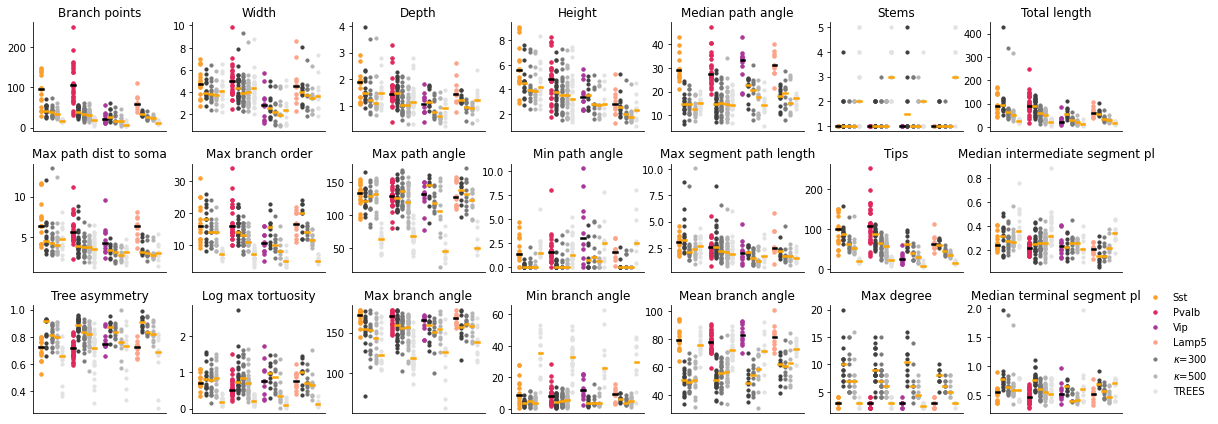

In [37]:
colors = ['#fd9e2b', '#e0285d', '#aa369a', '#fda389']
label_dict = {0:'Sst', 1:'Pvalb', 2:'Vip', 3:'Lamp5'}

fig, axes = plt.subplots(3,7,figsize=(17,6))
axes = axes.flatten()

morphometrics_ = morphometrics.iloc[indices_test]
offset = 1.8
morph_labels = np.array(labels_test)
for k in range(len(features)):
    
    for l in np.unique(morph_labels)[1:]:
        axes[k].scatter([offset*l]*sum(morph_labels == l), morphometrics_[features[k]].values[morph_labels == l], 
                    c=[colors[l]], label=label_dict[l], s=12 )

        axes[k].plot([offset*l -.1, offset*l + .1],  
                     [morphometrics_[morph_labels == l][features[k]].median(skipna=True), 
                      morphometrics_[morph_labels == l][features[k]].median(skipna=True)],
                 c='k', linewidth=2.5)

        sns.despine()
        axes[k].set_xticks([])
        axes[k].set_title(features[k].capitalize().replace('_', ' '))

# plot the sampled neurons 
morphometrics_tt = morphometrics_tt.iloc[tt_order]
sample_colors = sns.color_palette('Greys_r', n_colors=4)
kappas = [f'$\kappa$=100', f'$\kappa$=300', f'$\kappa$=500', 'TREES']

for n, df in enumerate([morphometrics_m1_100.iloc[label_indices], morphometrics_m1_300.iloc[label_indices], 
                        morphometrics_m1_500.iloc[label_indices], morphometrics_tt]):

    for k in range(len(features)):
        for l in np.unique(morph_labels)[1:]:
            axes[k].scatter([offset*l + (n+1)*0.3]*sum(morph_labels == l), 
                        df[features[k]].values[morph_labels == l], 
                        c=[sample_colors[n]], label=kappas[n] , s=10)

            axes[k].plot([offset*l -.1 + (n+1)*0.3,offset*l + .1 + (n+1)*0.3],  
                     [df[morph_labels == l][features[k]].median(skipna=True), 
                      df[morph_labels == l][features[k]].median(skipna=True)], 
                     c='orange', linewidth=2.5)
            
            
handles, legend_labels = axes[-4].get_legend_handles_labels()
legend_handles = np.array(handles)[[0,1,2,3,8,12,16]]
legend_labels = np.array(legend_labels)[[0,1,2,3,8,12,16]]
axes[-1].legend(legend_handles,legend_labels, frameon=False, bbox_to_anchor=(1.1,1.2))

plt.tight_layout() 
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.savefig('./pics/ICML/camera-ready/Suppl/morphometrics_m1_inh_data.svg', format='svg')
plt.savefig('./pics/ICML/camera-ready/Suppl/morphometrics_m1_inh_data.pdf', format='pdf')

In [46]:
morphometrics_ = morphometrics.iloc[indices_test]
morphometrics_['P'] = labels_test
morphometrics_['label'] = 'true'

morphometrics_m1_100_ = morphometrics_m1_100.iloc[label_indices]
morphometrics_m1_100_['P'] = labels_test

morphometrics_m1_300_ = morphometrics_m1_300.iloc[label_indices]
morphometrics_m1_300_['P'] = labels_test

morphometrics_m1_500_ = morphometrics_m1_500.iloc[label_indices]
morphometrics_m1_500_['P'] = labels_test

morphometrics_tt_ = morphometrics_tt.iloc[tt_order]
morphometrics_tt_['P'] = labels_test

from copy import copy
## get table data
morphometrics_table = morphometrics_

morphometrics_m1_100_['label'] = 'k100'
morphometrics_table = pd.concat((morphometrics_table, morphometrics_m1_100_))

morphometrics_m1_300_['label'] = 'k300'
morphometrics_table = pd.concat((morphometrics_table, morphometrics_m1_300_))

morphometrics_m1_500_['label'] = 'k500'
morphometrics_table = pd.concat((morphometrics_table, morphometrics_m1_500_))

morphometrics_tt_['label'] = 'TREES'
morphometrics_table = pd.concat((morphometrics_table, morphometrics_tt_))

renamed_features = [s.replace("_", " ").capitalize() for s in features]
rename_dict = dict(zip(morphometrics_table.columns, [s.replace("_", " ").capitalize() for s in morphometrics_table.columns]))

morphometrics_table = morphometrics_table.rename(columns=rename_dict)
del morphometrics_table['Unnamed: 0']

morphometrics_table = morphometrics_table[morphometrics_table['P'] != -100]

In [49]:
morphometrics_table.groupby(['P', 'Label'])[renamed_features].mean().round(2).T

P                                    0                                  \
Label                            TREES    k100    k300    k500    true   
Branch points                    11.93   44.13   40.00   34.80   92.13   
Width                             3.84    4.25    4.09    3.90    4.84   
Depth                             1.19    1.73    1.42    1.39    1.79   
Height                            3.64    4.71    4.39    4.25    5.84   
Median path angle                14.66   15.01   15.20   13.05   30.03   
Stems                             2.87    1.40    1.13    1.20    1.00   
Total length                     18.17  115.76   78.53   67.61  103.05   
Max path dist to soma             4.01    5.25    5.01    4.82    7.19   
Max branch order                  5.40   16.93   14.47   13.33   17.20   
Max path angle                   61.55  125.25  124.21  129.49  129.29   
Min path angle                    2.52    0.15    0.29    0.16    1.98   
Max segment path length           2.27    3.77    2.54    2.80    2.95   
Tips                             15.13   90.27   66.80   58.20   97.07   
Median intermediate segment pl    0.39    0.31    0.28    0.29    0.27   
Tree asymmetry                    0.65    0.85    0.81    0.80    0.71   
Log max tortuosity                0.20    0.85    0.75    0.84    0.75   
Max branch angle                124.99  150.40  144.78  142.13  168.81   
Min branch angle                 35.02    4.04    5.40    4.82   11.82   
Mean branch angle                72.21   49.05   52.05   51.12   80.37   
Max degree                        2.73   10.33    8.33    7.07    3.07   
Median terminal segment pl        0.65    0.83    0.71    0.66    0.54   

P                                    1                                  \
Label                            TREES    k100    k300    k500    true   
Branch points                    17.69   39.81   35.12   32.69  108.38   
Width                             3.92    4.41    4.17    4.01    5.04   
Depth                             1.25    1.50    1.19    1.11    1.56   
Height                            3.52    3.95    3.79    3.63    4.91   
Median path angle                16.35   15.61   15.85   15.29   29.25   
Stems                             2.92    1.19    1.19    1.27    1.00   
Total length                     22.65   86.66   55.42   47.49  100.67   
Max path dist to soma             3.61    4.47    3.93    3.88    6.06   
Max branch order                  6.88   15.77   12.81   11.96   17.58   
Max path angle                   64.01  126.14  134.97  119.71  129.07   
Min path angle                    2.27    0.32    0.33    0.40    1.82   
Max segment path length           2.01    3.02    2.40    2.28    2.59   
Tips                             21.69   80.77   59.54   51.92  111.50   
Median intermediate segment pl    0.34    0.25    0.26    0.25    0.22   
Tree asymmetry                    0.68    0.88    0.82    0.81    0.71   
Log max tortuosity                0.22    0.90    0.91    0.70    0.62   
Max branch angle                127.75  156.01  154.35  152.15  166.73   
Min branch angle                 31.70    5.37    5.87    5.74    9.24   
Mean branch angle                74.11   51.73   54.87   56.75   77.83   
Max degree                        2.96    9.35    7.27    5.88    2.85   
Median terminal segment pl        0.52    0.76    0.59    0.56    0.48   

P                                    2                                  \
Label                            TREES    k100    k300    k500    true   
Branch points                    14.20   31.50   24.00   19.80   25.50   
Width                             4.08    2.89    2.52    2.41    2.93   
Depth                             1.55    1.31    0.92    0.81    1.08   
Height                            3.64    3.59    3.01    2.93    3.64   
Median path angle                15.12   21.50   19.55   16.22   31.23   
Stems                             2.50    2.10    1.40    1.50    1.00   
To

In [48]:
morphometrics_table.groupby(['P', 'Label'])[renamed_features].std().round(2).T

P                                   0                                  1  \
Label                           TREES   k100   k300   k500   true  TREES   
Branch points                    4.54  12.79  12.92  10.88  41.23   5.21   
Width                            2.09   0.91   0.99   0.93   1.25   1.18   
Depth                            0.52   0.74   0.69   0.73   0.54   0.47   
Height                           1.83   1.40   1.39   1.42   1.95   1.54   
Median path angle                3.01   5.10   4.33   3.43   5.86   4.18   
Stems                            1.13   0.83   0.35   0.41   0.00   1.09   
Total length                     8.59  88.71  73.06  70.26  43.73   8.53   
Max path dist to soma            1.65   2.26   2.63   2.34   2.73   1.05   
Max branch order                 1.12   5.43   4.31   3.98   6.43   1.51   
Max path angle                  17.41  17.89  21.02  22.33  19.55  18.81   
Min path angle                   1.99   0.26   0.58   0.41   1.44   2.00   
Max segment path length          1.23   1.82   1.68   2.12   0.83   0.77   
Tips                             5.50  21.88  20.44  22.34  40.13   6.23   
Median intermediate segment pl   0.21   0.12   0.08   0.09   0.07   0.10   
Tree asymmetry                   0.18   0.09   0.07   0.07   0.08   0.15   
Log max tortuosity               0.11   0.37   0.35   0.39   0.21   0.12   
Max branch angle                28.59  25.31  20.70  21.36   9.74  16.81   
Min branch angle                14.33   2.01   3.43   2.95   8.57  10.99   
Mean branch angle               11.37   8.79   8.89  10.60   8.63   6.97   
Max degree                       0.46   3.58   3.50   3.06   0.59   0.53   
Median terminal segment pl       0.16   0.33   0.34   0.31   0.13   0.14   

P                                                               2         \
Label                            k100   k300   k500   true  TREES   k100   
Branch points                   10.84  11.54  11.63  50.87   4.96  15.39   
Width                            1.22   1.44   1.29   1.46   1.25   1.17   
Depth                            0.39   0.45   0.41   0.60   0.73   0.37   
Height                           1.44   1.49   1.50   1.72   1.89   0.99   
Median path angle                5.81   5.43   6.02   6.68   3.02   4.68   
Stems                            0.40   0.49   0.45   0.00   1.35   1.45   
Total length                    30.44  22.88  19.76  47.52   8.03  24.20   
Max path dist to soma            1.62   1.07   0.98   1.76   1.90   0.75   
Max branch order                 3.93   3.24   2.54   5.82   1.87   4.59   
Max path angle                  19.02  18.99  22.35  18.78  10.95  22.36   
Min path angle                   0.64   0.84   0.91   1.53   1.51   1.61   
Max segment path length          1.46   1.12   1.09   0.89   1.06   0.45   
Tips                            19.36  19.54  17.29  51.48   5.32  18.66   
Median intermediate segment pl   0.10   0.08   0.08   0.05   0.13   0.08   
Tree asymmetry                   0.06   0.07   0.08   0.07   0.16   0.06   
Log max tortuosity               0.51   0.34   0.35   0.30   0.06   0.34   
Max branch angle                16.27  15.58  17.16   9.57  22.10  14.94   
Min branch angle                 3.69   3.58   3.52   6.18  11.84   2.55   
Mean branch angle                8.76  10.45  10.07   7.20   7.41  10.47   
Max degree                       2.71   2.57   1.21   0.54   0.67   3.27   
Median terminal segment pl       0.13   0.11   0.13   0.12   0.45   0.09   

P                                                        3                \
Label                            k300   k500   true  TREES   k100   k300   
Branch points                   12.82  11.68  14.10   5.81   4.78   6.06   
Width                            1.27   1.32   1.55   1.64   1.52   1.47   
Depth                            0.37   0.42   0.42   0.68   0.19   0.24   
Height                           1.12   1.12   1.23   1.55   1.07   0.94   
Median path angle                7.27   5.76  

## Farrow data

In [72]:
morphometrics = pd.read_csv('./data/Farrow_data/morphometrics/morphometrics_real.csv')
morphometrics_m1_100 = pd.read_csv('./data/Farrow_data/morphometrics/soma-centered/test_data/morphometrics_rgc_100.csv')
morphometrics_m1_300 =  pd.read_csv('./data/Farrow_data/morphometrics/soma-centered/test_data/morphometrics_rgc_300.csv')
morphometrics_m1_500 =  pd.read_csv('./data/Farrow_data/morphometrics/soma-centered/test_data/morphometrics_rgc_500.csv')

morphometrics_tt = pd.read_csv("./data/Farrow_data/TREESToolbox/morphometrics/morphometrics_tt.csv")

In [73]:
import pickle

with open('./data/Farrow_data/iterator/soma_centered/test_iterator.pkl', 'rb') as f:
    test_iterator = pickle.load(f)

In [77]:
indices_test = np.array(test_iterator.sampler.indices)
labels_test = np.array(test_iterator.dataset.labels)[indices_test]


meta_data = pd.read_csv('./data/Farrow_data/meta_data_labeled_cells.csv')
labels = meta_data['cluster'].values

_, _ , files = list(os.walk('./data/Farrow_data/sampled_neurons/soma_centered/test_data/k100/'))[0]

# get proper sorting of the sampled data
sampled_order = np.array([int(f[:-4]) for f in files])
label_indices = [np.where(sampled_order == i)[0][0] for i in indices_test]

# get proper order for tt_files
_, _ , tt_files = list(os.walk('./data/Farrow_data/TREESToolbox/swc/'))[0]
tt_files = np.array([int(f.split("_")[0]) for f in tt_files])

cell_nr = meta_data.iloc[indices_test]['Cell_nr'].values
tt_order = [np.where(tt_files == s)[0][0] for s in cell_nr]

In [88]:
features = ['branch_points', 'width', 'depth', 'height', 'median_path_angle',
       'stems', 'total_length', 'max_path_dist_to_soma',
       'max_branch_order', 'max_path_angle', 'min_path_angle',
        'mean_soma_exit_angle', 'max_segment_path_length', 'tips',
       'median_intermediate_segment_pl', 'tree_asymmetry',
       'log_max_tortuosity',
       'max_branch_angle', 'min_branch_angle', 'mean_branch_angle',
       'max_degree', 'median_terminal_segment_pl']

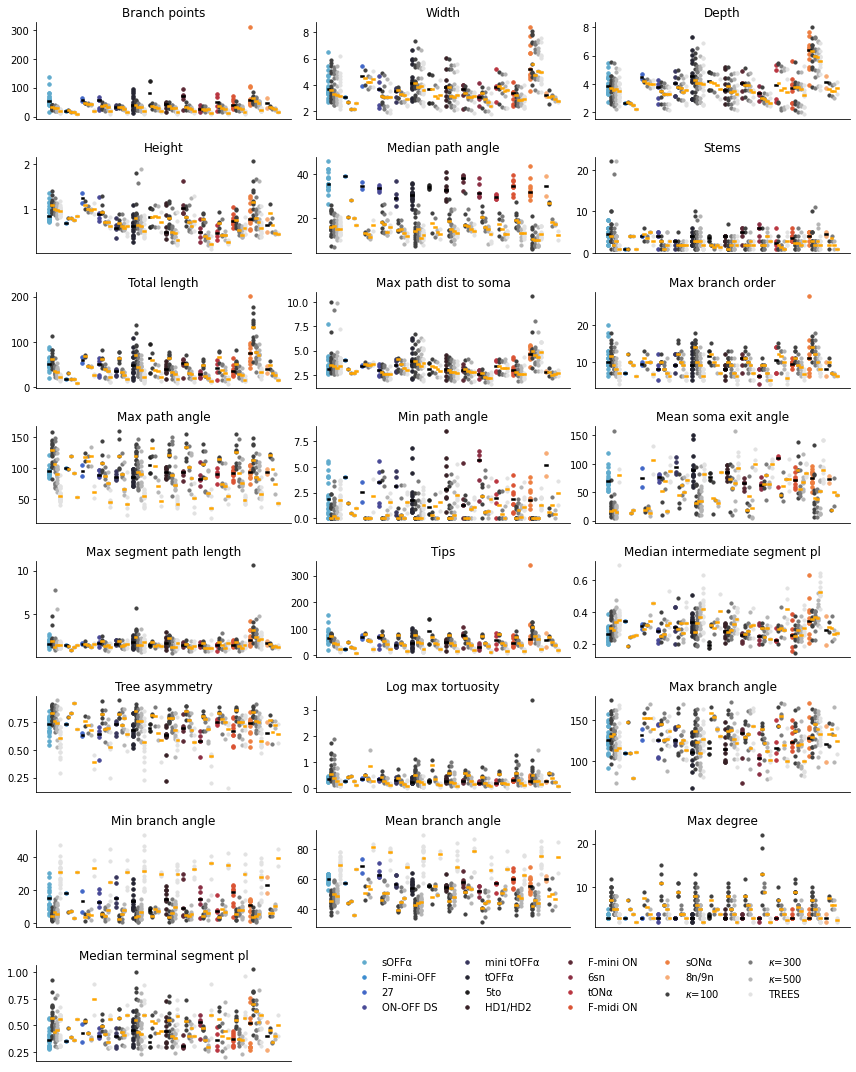

In [89]:
colors = sns.color_palette('icefire', n_colors=15)
label_dict = {-100:'no label', 13: '8n/9n', 12: 'sONα', 11: 'F-midi ON', 
              10: 'tONα', 9:'6sn', 8:'F-mini ON', 7:'HD1/HD2', 
              6:'5to', 5:'tOFFα', 4: 'mini tOFFα', 3: 'ON-OFF DS',
             2: '27', 1:'F-mini-OFF', 0: 'sOFFα'}

fig, axes = plt.subplots(8,3,figsize=(12,15))
axes = axes.flatten()

morphometrics_ = morphometrics.iloc[indices_test]
morph_labels = np.array(labels_test)
offset = 1.8
for k in range(len(features)):
    
    for c_ix, l in enumerate(np.unique(labels_test)[1:]):
        
        c_= colors[c_ix+1] 
        
        axes[k].scatter([c_ix*offset]*sum(morph_labels == l), morphometrics_[features[k]].values[morph_labels == l], 
                        c=[c_], label=label_dict[l],s=12 )


        axes[k].plot([c_ix*offset-.1, c_ix*offset+ .1],  [morphometrics_[morph_labels == l][features[k]].median(skipna=True), 
                                 morphometrics_[morph_labels == l][features[k]].median(skipna=True)],
                     c='k', linewidth=2.5)

    sns.despine()
    axes[k].set_xticks([])
    axes[k].set_title(features[k].capitalize().replace('_', ' '))
axes[-1].axis('off')
axes[-2].axis('off')
sample_colors = sns.color_palette('Greys_r', n_colors=4)
kappas = [f'$\kappa$=100', f'$\kappa$=300', f'$\kappa$=500', 'TREES']

for n, df in enumerate([morphometrics_m1_100.iloc[label_indices], morphometrics_m1_300.iloc[label_indices], 
                        morphometrics_m1_500.iloc[label_indices], morphometrics_tt.iloc[tt_order]]):

    for k in range(len(features)):
        
        for c_ix, l in enumerate(np.unique(labels_test)[1:]):
            
            axes[k].scatter([c_ix*offset + (n+1)*0.3]*sum(morph_labels == l), 
                            df[features[k]].values[morph_labels == l], 
                            c=[sample_colors[n]], label=kappas[n],s=10 )
    

            axes[k].plot([c_ix*offset -.1 + (n+1)*0.3,c_ix*offset +.1 + (n+1)*0.3],  
                         [df[morph_labels == l][features[k]].median(skipna=True), 
                          df[morph_labels == l][features[k]].median(skipna=True)], 
                         c='orange', linewidth=2.5)
        
handles, legend_labels = axes[-4].get_legend_handles_labels()
legend_handles = np.array(handles)[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,29,43, 57]]
legend_labels = np.array(legend_labels)[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,29,43, 57]]
axes[-1].legend(legend_handles,legend_labels, frameon=False, bbox_to_anchor=(.85,1.2),ncol=5)

plt.tight_layout() 
plt.subplots_adjust(hspace=0.4, wspace=0.1)
plt.savefig('./pics/ICML/camera-ready/Suppl/morphometrics_rgc_data.svg', format='svg')
plt.savefig('./pics/ICML/camera-ready/Suppl/morphometrics_rgc_data.pdf', format='pdf')

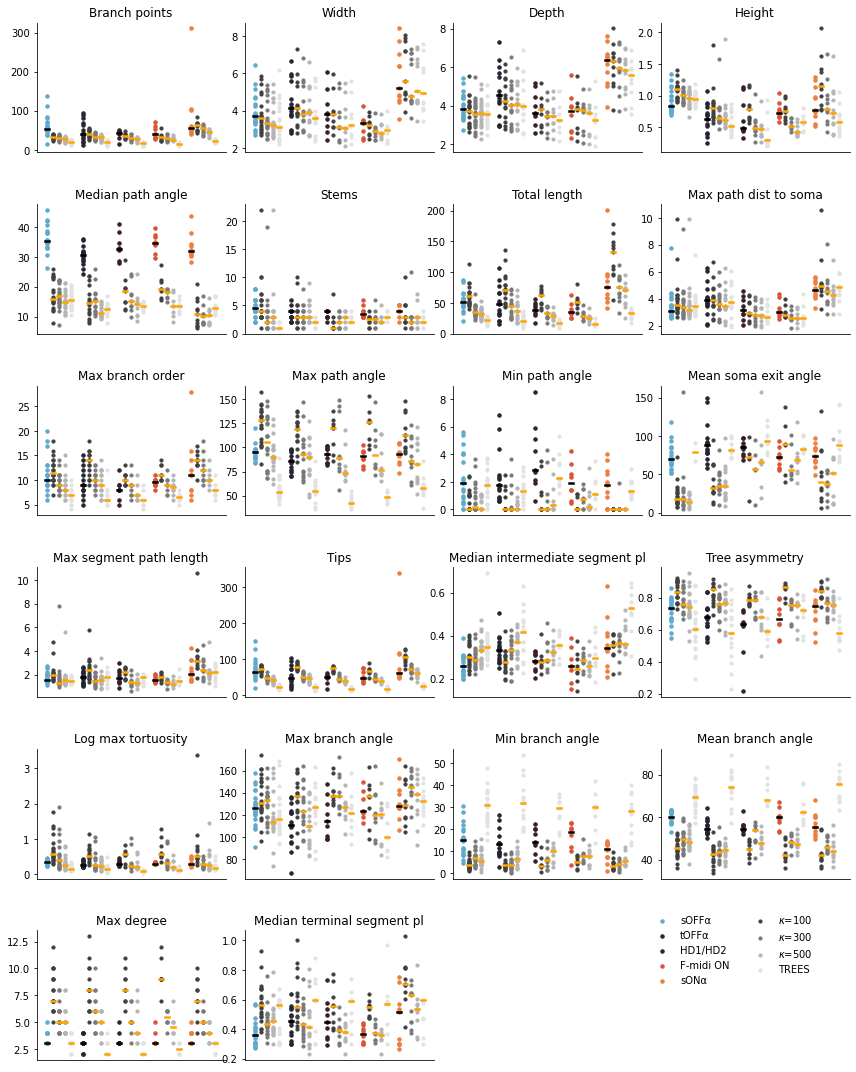

In [87]:
## only show for the three largest populations

colors = sns.color_palette('icefire', n_colors=15)
label_dict = {-100:'no label', 13: '8n/9n', 12: 'sONα', 11: 'F-midi ON', 
              10: 'tONα', 9:'6sn', 8:'F-mini ON', 7:'HD1/HD2', 
              6:'5to', 5:'tOFFα', 4: 'mini tOFFα', 3: 'ON-OFF DS',
             2: '27', 1:'F-mini-OFF', 0: 'sOFFα'}

fig, axes = plt.subplots(6,4,figsize=(12,15))
axes = axes.flatten()

morphometrics_ = morphometrics.iloc[indices_test]
morph_labels = np.array(labels_test)
offset = 1.8
for k in range(len(features)):
    j = 0
    for c_ix, l in enumerate(np.unique(labels_test)[1:]):
        
        c_= colors[c_ix+1] 
        
        if sum(morph_labels == l) > 5:
            axes[k].scatter([j*offset]*sum(morph_labels == l), morphometrics_[features[k]].values[morph_labels == l], 
                            c=[c_], label=label_dict[l],s=12 )


            axes[k].plot([j*offset-.1, j*offset+ .1],  [morphometrics_[morph_labels == l][features[k]].median(skipna=True), 
                                     morphometrics_[morph_labels == l][features[k]].median(skipna=True)],
                         c='k', linewidth=2.5)
            j+=1
            
    sns.despine()
    axes[k].set_xticks([])
    axes[k].set_title(features[k].capitalize().replace('_', ' '))
axes[-1].axis('off')
axes[-2].axis('off')
sample_colors = sns.color_palette('Greys_r', n_colors=4)
kappas = [f'$\kappa$=100', f'$\kappa$=300', f'$\kappa$=500', 'TREES']
for n, df in enumerate([morphometrics_m1_100.iloc[label_indices], morphometrics_m1_300.iloc[label_indices], 
                        morphometrics_m1_500.iloc[label_indices],morphometrics_tt.iloc[tt_order]]):

    for k in range(len(features)):
        j=0
        for c_ix, l in enumerate(np.unique(labels_test)[1:]):
            if sum(morph_labels == l) > 5:
                axes[k].scatter([j*offset + (n+1)*0.3]*sum(morph_labels == l), 
                                df[features[k]].values[morph_labels == l], 
                                c=[sample_colors[n]], label=kappas[n],s=10 )


                axes[k].plot([j*offset -.1 + (n+1)*0.3,j*offset +.1 + (n+1)*0.3],  
                             [df[morph_labels == l][features[k]].median(skipna=True), 
                              df[morph_labels == l][features[k]].median(skipna=True)], 
                             c='orange', linewidth=2.5)
                j+=1
handles, legend_labels = axes[-4].get_legend_handles_labels()
legend_handles = np.array(handles)[[0,1,2,3,4,5, 10, 15, 20]]
legend_labels = np.array(legend_labels)[[0,1,2,3,4,5, 10, 15, 20]]
axes[-1].legend(legend_handles,legend_labels, frameon=False, bbox_to_anchor=(.85,1.2),ncol=2)

plt.tight_layout() 
plt.subplots_adjust(hspace=0.4, wspace=0.1)
plt.savefig('./pics/ICML/camera-ready/Suppl/morphometrics_rgc_data_sel.svg', format='svg')
plt.savefig('./pics/ICML/camera-ready/Suppl/morphometrics_rgc_data_sel.pdf', format='pdf')

In [84]:
morphometrics_ = morphometrics.iloc[indices_test]
morphometrics_['P'] = labels_test
morphometrics_['label'] = 'true'

morphometrics_m1_100_ = morphometrics_m1_100.iloc[label_indices]
morphometrics_m1_100_['P'] = labels_test

morphometrics_m1_300_ = morphometrics_m1_300.iloc[label_indices]
morphometrics_m1_300_['P'] = labels_test

morphometrics_m1_500_ = morphometrics_m1_500.iloc[label_indices]
morphometrics_m1_500_['P'] = labels_test

morphometrics_tt_ = morphometrics_tt.iloc[tt_order]
morphometrics_tt_['P'] = labels_test

from copy import copy
## get table data
morphometrics_table = morphometrics_

morphometrics_m1_100_['label'] = 'k100'
morphometrics_table = pd.concat((morphometrics_table, morphometrics_m1_100_))

morphometrics_m1_300_['label'] = 'k300'
morphometrics_table = pd.concat((morphometrics_table, morphometrics_m1_300_))

morphometrics_m1_500_['label'] = 'k500'
morphometrics_table = pd.concat((morphometrics_table, morphometrics_m1_500_))

morphometrics_tt_['label'] = 'TREES'
morphometrics_table = pd.concat((morphometrics_table, morphometrics_tt_))

renamed_features = [s.replace("_", " ").capitalize() for s in features]
rename_dict = dict(zip(morphometrics_table.columns, [s.replace("_", " ").capitalize() for s in morphometrics_table.columns]))

morphometrics_table = morphometrics_table.rename(columns=rename_dict)
del morphometrics_table['Unnamed: 0']

morphometrics_table = morphometrics_table[morphometrics_table['P'] != -100]

In [85]:
morphometrics_table.groupby(["P", "Label"])[renamed_features].mean().round(2).T.to_csv("./data/Farrow_data/morphometrics/aggregated_morphometrics.csv")

In [86]:
morphometrics_table.groupby(["P", "Label"])[renamed_features].mean().round(2).T

P                                   0                                   \
Label                            TREES    k100    k300    k500    true   
Branch points                    19.20   33.45   30.40   27.10   61.85   
Width                             3.49    3.88    3.60    3.53    3.97   
Depth                             3.55    3.72    3.55    3.60    3.96   
Height                            0.96    1.10    1.00    0.95    0.92   
Median path angle                15.52   17.40   16.96   15.36   36.20   
Stems                             1.10    5.70    3.35    3.80    4.80   
Total length                     21.22   62.15   37.12   33.28   52.68   
Max path dist to soma             3.66    4.08    3.73    3.67    3.50   
Max branch order                  6.70   11.90    9.60    8.90   11.15   
Max path angle                   57.25  124.01  104.63   92.95   94.99   
Min path angle                    1.82    0.59    0.80    0.31    2.29   
Mean soma exit angle             79.40   22.89   30.72   15.63   73.60   
Max segment path length           1.52    2.17    1.76    1.74    1.75   
Tips                             22.30   71.20   47.75   41.40   71.75   
Median intermediate segment pl    0.36    0.31    0.30    0.33    0.26   
Tree asymmetry                    0.61    0.84    0.78    0.74    0.72   
Log max tortuosity                0.18    0.71    0.56    0.33    0.35   
Max branch angle                120.86  135.61  130.83  118.61  126.94   
Min branch angle                 30.07    4.14    7.29    6.47   15.37   
Mean branch angle                68.86   45.48   49.76   49.06   60.27   
Max degree                        3.15    7.85    5.40    5.05    3.35   
Median terminal segment pl        0.49    0.58    0.45    0.46    0.37   

P                                   1                                  ...  \
Label                            TREES    k100    k300   k500    true  ...   
Branch points                     9.00   21.00   14.00  17.00   18.00  ...   
Width                             2.65    2.68    2.16   2.20    3.07  ...   
Depth                             2.23    2.73    2.69   2.54    2.66  ...   
Height                            0.84    0.79    0.79   0.75    0.68  ...   
Median path angle                16.99   20.54   28.12  20.22   39.33  ...   
Stems                             1.00    1.00    4.00   4.00    1.00  ...   
Total length                      9.44   31.69   17.72  16.92   18.66  ...   
Max path dist to soma             2.94    3.09    2.72   2.71    4.08  ...   
Max branch order                  6.00   12.00   10.00   9.00    7.00  ...   
Max path angle                   53.10   98.60  119.65  91.81   99.60  ...   
Min path angle                    1.02    1.45    0.54   0.29    4.03  ...   
Mean soma exit angle               NaN     NaN   13.78  18.49     NaN  ...   
Max segment path length           1.52    1.45    0.92   1.27    1.53  ...   
Tips                             10.00   49.00   32.00  28.00   23.00  ...   
Median intermediate segment pl    0.25    0.19    0.24   0.25    0.35  ...   
Tree asymmetry                    0.69    0.80    0.84   0.93    0.74  ...   
Log max tortuosity                0.13    0.43    0.47   0.27    0.29  ...   
Max branch angle                111.22  147.82  109.70  79.28  110.37  ...   
Min branch angle                 30.80    6.43    7.01   2.98   18.04  ...   
Mean branch angle                66.45   43.69   45.48  35.85   57.09  ...   
Max degree                        2.00    7.00    5.00   4.00    3.00  ...   
Median terminal segment pl        0.56    0.47    0.39   0.36    0.35  ...   

P                                   12                                  \
Label                            TREES    k100    k300    k500    true   
Branch points                    22.82   61.00   52.45   43.91   84.27   
Width                             5.36    6.10    5.56    5.53    5.77   
Depth                             5.39    6.10    5.86